In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import requests
import yfinance as yf

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , explained_variance_score , r2_score
from sklearn.metrics import mean_poisson_deviance , mean_gamma_deviance , accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
btc_data = yf.download('BTC-USD',interval='15m', period='1mo')

/tmp/ipython-input-5-1872627716.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-USD',interval='15m', period='1mo')
[*********************100%***********************]  1 of 1 completed


In [6]:
print(btc_data.head())

Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-06-30 13:15:00+00:00  107841.632812  107845.781250  107729.109375   
2025-06-30 13:30:00+00:00  107667.125000  107862.250000  107621.578125   
2025-06-30 13:45:00+00:00  107520.664062  107687.765625  107520.664062   
2025-06-30 14:00:00+00:00  107421.062500  107550.656250  107208.710938   
2025-06-30 14:15:00+00:00  107285.148438  107617.539062  107284.289062   

Price                               Open      Volume  
Ticker                           BTC-USD     BTC-USD  
Datetime                                              
2025-06-30 13:15:00+00:00  107729.109375           0  
2025-06-30 13:30:00+00:00  107854.898438  2511310848  
2025-06-30 13:45:00+00:00  107633.632812  2257514496  
2025-06-30 14:00:00+00:00  107533.171875   456404992  
2025-06-30 14:15:00+00

In [7]:
print('Total number of days present in the dataset: ',btc_data.shape[0])
print('Total number of fields present in the dataset: ',btc_data.shape[1])

Total number of days present in the dataset:  2881
Total number of fields present in the dataset:  5


In [8]:
btc_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-06-30 13:15:00+00:00,107841.632812,107845.781250,107729.109375,107729.109375,0
2025-06-30 13:30:00+00:00,107667.125000,107862.250000,107621.578125,107854.898438,2511310848
2025-06-30 13:45:00+00:00,107520.664062,107687.765625,107520.664062,107633.632812,2257514496
2025-06-30 14:00:00+00:00,107421.062500,107550.656250,107208.710938,107533.171875,456404992
2025-06-30 14:15:00+00:00,107285.148438,107617.539062,107284.289062,107580.859375,369401856


In [9]:
btc_data.shape

(2881, 5)

In [10]:
btc_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-07-30 12:15:00+00:00,117782.554688,117820.632812,117442.210938,117460.242188,1120722944
2025-07-30 12:30:00+00:00,117689.796875,117867.875000,117621.476562,117729.578125,1604616192
2025-07-30 12:45:00+00:00,117814.875000,117818.726562,117625.585938,117638.757812,1230712832
2025-07-30 13:00:00+00:00,117729.609375,117846.070312,117685.687500,117785.914062,393080832
2025-07-30 13:15:00+00:00,117640.953125,117792.054688,117535.273438,117535.273438,923246592


In [11]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2025-06-30 13:15:00+00:00 to 2025-07-30 13:15:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2881 non-null   float64
 1   (High, BTC-USD)    2881 non-null   float64
 2   (Low, BTC-USD)     2881 non-null   float64
 3   (Open, BTC-USD)    2881 non-null   float64
 4   (Volume, BTC-USD)  2881 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 135.0 KB


In [12]:
btc_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03
mean,114941.005616,115034.655230,114842.825660,114938.978775,1.328224e+09
std,4736.694463,4753.053502,4719.595801,4738.108694,3.914694e+09
min,105404.992188,105440.414062,105159.734375,105409.757812,0.000000e+00
25%,109156.828125,109209.007812,109052.164062,109158.750000,1.172357e+08
50%,117642.148438,117754.000000,117530.820312,117651.976562,8.190034e+08
75%,118391.132812,118489.054688,118294.101562,118389.890625,1.208680e+09
max,122940.179688,123077.632812,122757.421875,122884.492188,4.813039e+10


In [13]:
print('Null Values: ', btc_data.isnull().values.sum())

Null Values:  0


In [14]:
print('NA value:',btc_data.isnull().values.any())

NA value: False


In [15]:
print(btc_data.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [16]:
print(btc_data.columns.tolist())

[('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]


In [17]:
btc_data['Datetime'] = pd.to_datetime(btc_data.index, format='%Y-%m-%d %H:%M:%S')
btc_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Datetime']

In [18]:
print(btc_data.head())

                                    Open           High            Low  \
Datetime                                                                 
2025-06-30 13:15:00+00:00  107841.632812  107845.781250  107729.109375   
2025-06-30 13:30:00+00:00  107667.125000  107862.250000  107621.578125   
2025-06-30 13:45:00+00:00  107520.664062  107687.765625  107520.664062   
2025-06-30 14:00:00+00:00  107421.062500  107550.656250  107208.710938   
2025-06-30 14:15:00+00:00  107285.148438  107617.539062  107284.289062   

                                   Close      Volume                  Datetime  
Datetime                                                                        
2025-06-30 13:15:00+00:00  107729.109375           0 2025-06-30 13:15:00+00:00  
2025-06-30 13:30:00+00:00  107854.898438  2511310848 2025-06-30 13:30:00+00:00  
2025-06-30 13:45:00+00:00  107633.632812  2257514496 2025-06-30 13:45:00+00:00  
2025-06-30 14:00:00+00:00  107533.171875   456404992 2025-06-30 14:00:00+00:

In [19]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2025-06-30 13:15:00+00:00 to 2025-07-30 13:15:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Open      2881 non-null   float64            
 1   High      2881 non-null   float64            
 2   Low       2881 non-null   float64            
 3   Close     2881 non-null   float64            
 4   Volume    2881 non-null   int64              
 5   Datetime  2881 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 157.6 KB


In [20]:
closedf1 = btc_data[['Datetime','Close']]

In [21]:
closedf1.shape

(2881, 2)

In [22]:
fig = px.line(closedf1 , x=closedf1.Datetime , y=closedf1.Close,labels={'date':'Data','close': 'Close Price'})
fig.update_traces(marker_line_width=2 , opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='1 Month data',plot_bgcolor='white',
                  font_size=12, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [23]:
closedf = btc_data[['Datetime','Close','Open','High','Low']]

In [24]:
import warnings
warnings.filterwarnings('ignore')
closedf['Open'] = closedf['Close'].shift(1)
closedf['High'] = closedf['Close'] * (1 + np.random.uniform(0, 0.01, len(closedf)))  # Close + random %
closedf['Low'] = closedf['Close'] * (1 - np.random.uniform(0, 0.01, len(closedf)))  # Close - random %
closedf['Open'].fillna(closedf['Close'], inplace=True)

fig = go.Figure(data=[go.Candlestick(x=closedf['Datetime'],
                                     open=closedf['Open'],
                                     high=closedf['High'],
                                     low=closedf['Low'],
                                     close=closedf['Close'])])


fig.update_layout(title_text='1 Month Data - Candlestick Chart', plot_bgcolor='white',
                  font_size=12, font_color='black',
                  xaxis_title='Datetime', yaxis_title='Price')

# Removing grid lines for a cleaner look
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()

In [25]:
del closedf1['Datetime']
scaler=MinMaxScaler(feature_range=(0,1))
closedf1=scaler.fit_transform(np.array(closedf1).reshape(-1,1))
print(closedf1.shape)

(2881, 1)


In [26]:
closedf1

array([[0.132726  ],
       [0.13992434],
       [0.12726231],
       ...,
       [0.69981035],
       [0.70823144],
       [0.69388841]])

In [27]:
training_size=int(len(closedf1)*0.60)
test_size=len(closedf1)-training_size
train_data,test_data=closedf1[0:training_size,:],closedf1[training_size:len(closedf1),:1]
print("train_data:", train_data.shape)
print("test_data:", test_data.shape)

train_data: (1728, 1)
test_data: (1153, 1)


In [28]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1712, 15)
y_train: (1712,)
X_test: (1137, 15)
y_test: (1137,)


In [30]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (1712, 15, 1)
X_test: (1137, 15, 1)


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(None, 1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(50, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1073 - val_loss: 0.0036
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0052 - val_loss: 6.0992e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0041 - val_loss: 5.3273e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0038 - val_loss: 5.5943e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - val_loss: 9.1987e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0031 - val_loss: 3.8760e-04
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032 - val_loss: 3.8774e-04
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0032 - val_loss: 5.8468e-04
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031 - val_loss: 3.9802e-04
Epoch 12/100
54/54 ━

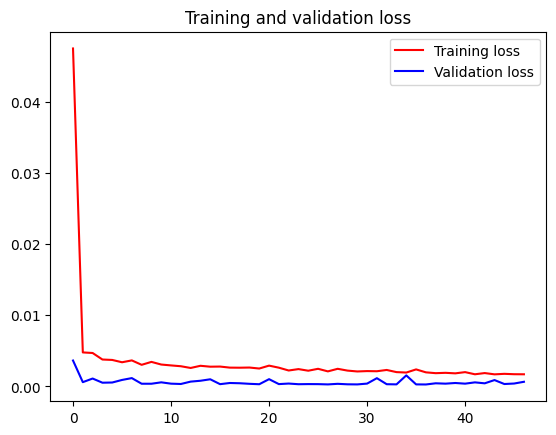

<Figure size 640x480 with 0 Axes>

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r',label='Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


((1712, 1), (1137, 1))

In [34]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [35]:
print("Train data RMSE:",math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE:" , mean_squared_error(original_ytrain,train_predict))
print("Train data MAE :", mean_absolute_error(original_ytrain,train_predict))

print("Test data RMSE:",math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE:", mean_squared_error(original_ytest,test_predict))
print("Test data MAE:", mean_absolute_error(original_ytest,test_predict))

Train data RMSE: 383.29874704097585
Train data MSE: 146917.929483182
Train data MAE : 284.7651914792641
Test data RMSE: 449.30847017508336
Test data MSE: 201878.10137107378
Test data MAE: 384.09454705364976


In [36]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.9950250534349706
Test data explained variance regression score: 0.8975425136660695


In [37]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9942645592322775
Test data R2 score: 0.7106679587075213


In [38]:
print("Train data MGD:", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD:", mean_gamma_deviance(original_ytest, test_predict))

print("Train data MPD:", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD:", mean_poisson_deviance(original_ytest , test_predict))

Train data MGD: 1.1042783665123237e-05
Test data MGD: 1.4470916303587277e-05
Train data MPD: 1.2727303266621897
Test data MPD: 1.70915012346537


In [39]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data:", trainPredictPlot.shape)

Train predicted data: (2881, 1)


In [40]:
testPredictPlot = np.empty_like(closedf1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf1)-1, :] = test_predict
print("Test predicted data:", testPredictPlot.shape)

Test predicted data: (2881, 1)


In [41]:
name = cycle(['Original close price','Train predicted close price','Test predicted close price'])

In [42]:
print(f"Length of 'Datetime': {len(closedf['Datetime'])}")
print(f"Length of 'original_close': {len(closedf['Close'])}")
print(f"Length of 'trainPredictPlot': {len(trainPredictPlot)}")
print(f"Length of 'testPredictPlot': {len(testPredictPlot)}")


trainPredictPlot_padded = np.pad(trainPredictPlot, (0, len(closedf['Datetime']) - len(trainPredictPlot)), mode='constant', constant_values=np.nan)
testPredictPlot_padded = np.pad(testPredictPlot, (0, len(closedf['Datetime']) - len(testPredictPlot)), mode='constant', constant_values=np.nan)

plotdf = pd.DataFrame({
    'Datetime': closedf['Datetime'],
    'original_close': closedf['Close'],
    'train_predicted_close': trainPredictPlot_padded.tolist(),
    'test_predicted_close': testPredictPlot_padded.tolist()
})

print(plotdf.head())

Length of 'Datetime': 2881
Length of 'original_close': 2881
Length of 'trainPredictPlot': 2881
Length of 'testPredictPlot': 2881
                                           Datetime  original_close  \
Datetime                                                              
2025-06-30 13:15:00+00:00 2025-06-30 13:15:00+00:00   107729.109375   
2025-06-30 13:30:00+00:00 2025-06-30 13:30:00+00:00   107854.898438   
2025-06-30 13:45:00+00:00 2025-06-30 13:45:00+00:00   107633.632812   
2025-06-30 14:00:00+00:00 2025-06-30 14:00:00+00:00   107533.171875   
2025-06-30 14:15:00+00:00 2025-06-30 14:15:00+00:00   107580.859375   

                          train_predicted_close test_predicted_close  
Datetime                                                              
2025-06-30 13:15:00+00:00                 [nan]                [nan]  
2025-06-30 13:30:00+00:00                 [nan]                [nan]  
2025-06-30 13:45:00+00:00                 [nan]                [nan]  
2025-06-30 14:00:0

In [43]:
plotdf = pd.DataFrame({'Datetime': closedf['Datetime'],
                       'original_close': closedf['Close'],
                       'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [44]:
fig = px.line(plotdf,x=plotdf['Datetime'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
              labels={'valu':'BTC price','Datetime' : 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white',font_size=15,font_color='black',legend_title_text='Close price')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [45]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = x_input[0].tolist()  # Flatten the input once

lst_output = []
n_steps = time_step
i = 0
pred_intervals = 50

# Loop to predict next intervals
while i < pred_intervals:
    if len(temp_input) > time_step:
        # Use only the last `n_steps` inputs
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    # Predict and update
    yhat = model.predict(x_input, verbose=0)

    # Add prediction to output
    lst_output.append(yhat[0][0])

    # Update temp_input list
    temp_input.append(yhat[0][0])

    i += 1  # Correct the counter increment

print(f"Output of predicted next 32 intervals: {len(lst_output)}")

Output of predicted next 32 intervals: 50


In [46]:
last_hours=np.arange(1,time_step+1)
pred_hours=np.arange(time_step+1,time_step+pred_intervals+1)
print(last_hours)
print(pred_hours)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65]


In [47]:
# Assuming `last_hours` is a list or array and `pred_hours` is a scalar
if isinstance(pred_hours, (list, np.ndarray)):
    pred_hours = pred_hours[0]  # Extract the first element if it's an array or list

temp_mat = np.empty((int(len(last_hours)) + int(pred_hours) + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]



last_original_hour_value = temp_mat
next_predicted_days_value = temp_mat

last_original_hour_value[0:time_step+1] = scaler.inverse_transform(closedf1[len(closedf1)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_hour_value':last_original_hour_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 candles close price' , 'Predicted next 32 candles '])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_hour_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'BTC price' , 'index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 min vs next 32 15 min',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()